# 梯度下降和随机梯度下降的 Gluon 实现

在 Gluon 里，使用小批量随机梯度下降很方便，我们无需重新实现该算法。特别地，当批量大小等于数据集样本数时，该算法即为梯度下降；批量大小为 1 即为随机梯度下降。

首先，导入本节中实验所需的包或模块。

In [1]:
import sys
sys.path.append('..')
import gluonbook as gb
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import nn, data as gdata, loss as gloss
import numpy as np

下面生成实验数据集并定义线性回归模型。

In [2]:
# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

# 线性回归模型。
net = nn.Sequential()
net.add(nn.Dense(1))

为了使学习率能够自我衰减，我们需要访问 `gluon.Trainer` 的 `learning_rate` 属性并使用 `set_learning_rate` 函数。

In [3]:
# 优化目标函数。
def optimize(batch_size, trainer, num_epochs, decay_epoch, log_interval,
             features, labels, net):
    dataset = gdata.ArrayDataset(features, labels)
    data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)
    loss = gloss.L2Loss()
    ls = [loss(net(features), labels).mean().asnumpy()]
    for epoch in range(1, num_epochs + 1): 
        # 学习率自我衰减。
        if decay_epoch and epoch > decay_epoch:
            trainer.set_learning_rate(trainer.learning_rate * 0.1)
        for batch_i, (X, y) in enumerate(data_iter):
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % log_interval == 0:
                ls.append(loss(net(features), labels).mean().asnumpy())
    # 为了便于打印，改变输出形状并转化成 numpy 数组。
    print('w:', net[0].weight.data(), '\nb:', net[0].bias.data(), '\n')
    es = np.linspace(0, num_epochs, len(ls), endpoint=True)
    gb.semilogy(es, ls, 'epoch', 'loss')

我们将 `optimize` 函数定义在 `gluonbook` 包中供后面章节调用。以下几组实验分别重现了 [" 梯度下降和随机梯度下降 "](gd-sgd.md) 一节中实验结果。

w: 
[[ 2.00028014 -3.40104818]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 4.20072889]
<NDArray 1 @cpu(0)> 



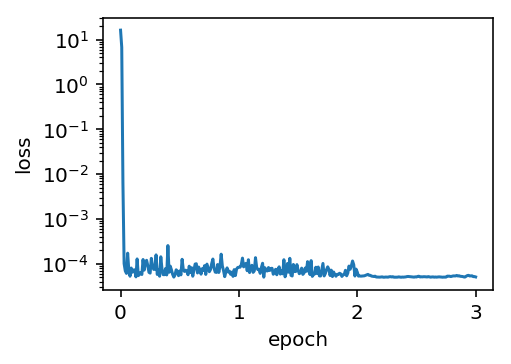

In [4]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.2})
optimize(batch_size=1, trainer=trainer, num_epochs=3, decay_epoch=2,
         log_interval=10, features=features, labels=labels, net=net)

w: 
[[ 2.00053716 -3.40285206]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 4.19865417]
<NDArray 1 @cpu(0)> 



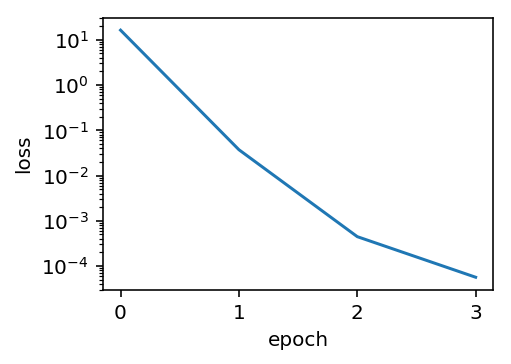

In [5]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.999})
optimize(batch_size=1000, trainer=trainer, num_epochs=3, decay_epoch=None,
         log_interval=1000, features=features, labels=labels, net=net)

w: 
[[ 1.99995708 -3.39997506]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 4.20056486]
<NDArray 1 @cpu(0)> 



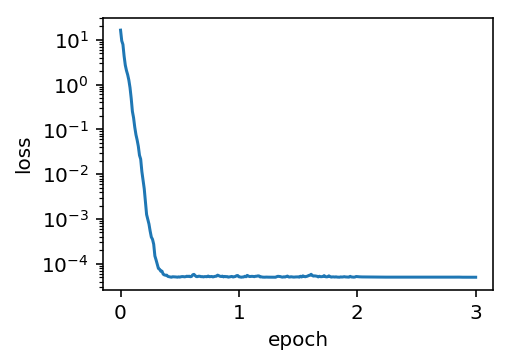

In [6]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.2})
optimize(batch_size=10, trainer=trainer, num_epochs=3, decay_epoch=2,
         log_interval=10, features=features, labels=labels, net=net)

w: 
[[ nan  nan]]
<NDArray 1x2 @cpu(0)> 
b: 
[ nan]
<NDArray 1 @cpu(0)> 



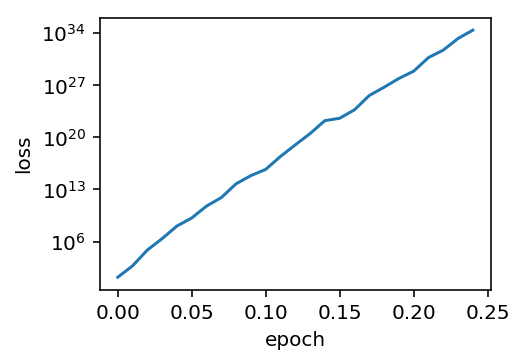

In [7]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 5})
optimize(batch_size=10, trainer=trainer, num_epochs=3, decay_epoch=2,
         log_interval=10, features=features, labels=labels, net=net)

w: 
[[ 0.69046748 -1.20069969]]
<NDArray 1x2 @cpu(0)> 
b: 
[ 1.37658739]
<NDArray 1 @cpu(0)> 



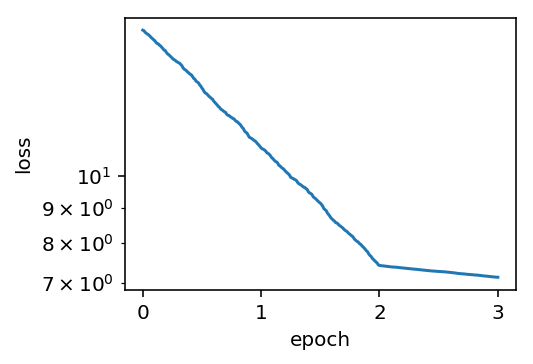

In [8]:
net.initialize(init.Normal(sigma=0.01), force_reinit=True)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.002})
optimize(batch_size=10, trainer=trainer, num_epochs=3, decay_epoch=2,
         log_interval=10, features=features, labels=labels, net=net)

## 小结

* 使用 Gluon 的 `Trainer` 可以方便地使用小批量随机梯度下降。
* 访问 `gluon.Trainer` 的 `learning_rate` 属性并使用 `set_learning_rate` 函数可以在迭代过程中调整学习率。


## 练习

* 查阅网络或书本资料，了解学习率自我衰减的其他方法。


## 扫码直达 [ 讨论区 ](https://discuss.gluon.ai/t/topic/1878)


![](../img/qr_gd-sgd-gluon.svg)